<a href="https://colab.research.google.com/github/sameer203/Tensorflow_/blob/main/13_time_series_forecasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Data

In [53]:
import os

ROOT = "/content/drive/MyDrive/Tensorflow"

os.chdir(ROOT)

In [54]:
import pandas as pd
import matplotlib.pyplot as plt


In [55]:
df = pd.read_csv("/content/drive/MyDrive/Tensorflow/BTC_USD_2014-11-02_2021-11-11-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])

In [56]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2014-11-02,BTC,325.22633,338.01050,338.12950,319.36700
2014-11-03,BTC,331.60083,325.22633,333.75983,319.04350
2014-11-04,BTC,324.71833,331.60083,332.75133,323.06333
2014-11-05,BTC,332.45666,324.71833,335.81166,320.93333
2014-11-06,BTC,336.58500,332.45666,341.49000,328.56166


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2562 entries, 2014-11-02 to 2021-11-11
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2562 non-null   object 
 1   Closing Price (USD)  2562 non-null   float64
 2   24h Open (USD)       2562 non-null   float64
 3   24h High (USD)       2562 non-null   float64
 4   24h Low (USD)        2562 non-null   float64
dtypes: float64(4), object(1)
memory usage: 120.1+ KB


In [58]:
len(df)

2562

In [59]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})

In [60]:
bitcoin_prices.head()

,Price
Date,
2014-11-02,325.22633
2014-11-03,331.60083
2014-11-04,324.71833
2014-11-05,332.45666
2014-11-06,336.58500


In [61]:
len(bitcoin_prices)

2562

Text(0.5, 1.0, 'BTC historical Data')

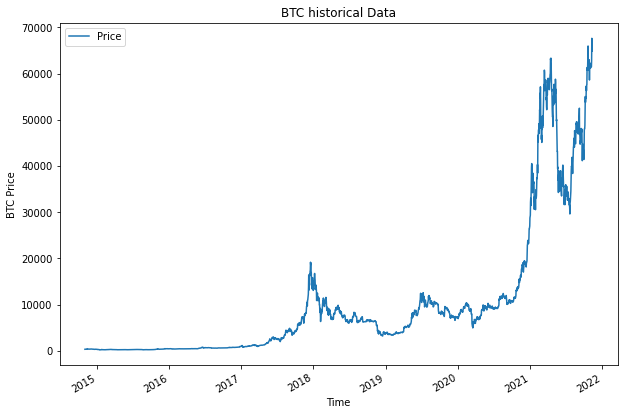

In [62]:
bitcoin_prices.plot(figsize=(10,7))
plt.xlabel("Time")
plt.ylabel("BTC Price")
plt.title("BTC historical Data")

In [63]:
bitcoin_prices = bitcoin_prices.iloc[:-100]

In [64]:
# Deleting last 100 rows
#bitcoin_prices_new = bitcoin_prices.drop(bitcoin_prices.tail(100).index,
                                     #inplace=True)

In [65]:
len(bitcoin_prices)

2462

Text(0.5, 1.0, 'BTC historical Data')

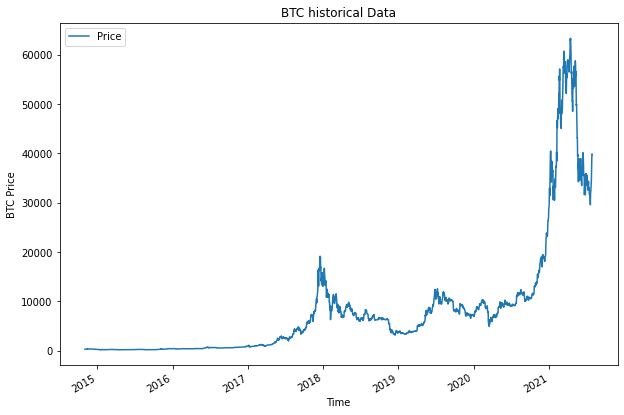

In [66]:
bitcoin_prices.plot(figsize=(10,7))
plt.xlabel("Time")
plt.ylabel("BTC Price")
plt.title("BTC historical Data")

### Train Test split

In [67]:
# bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[-10:], prices[-10:]

(array(['2021-07-21T00:00:00.000000000', '2021-07-22T00:00:00.000000000',
        '2021-07-23T00:00:00.000000000', '2021-07-24T00:00:00.000000000',
        '2021-07-25T00:00:00.000000000', '2021-07-26T00:00:00.000000000',
        '2021-07-27T00:00:00.000000000', '2021-07-28T00:00:00.000000000',
        '2021-07-29T00:00:00.000000000', '2021-07-30T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([29608.59725347, 32014.43603389, 32203.3656377 , 33117.75146222,
        34014.618359  , 34574.67066093, 37114.29662368, 38963.92285736,
        39917.4493694 , 39810.51797108]))

In [136]:
len(prices)

2462

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1969, 493, 1969, 493)

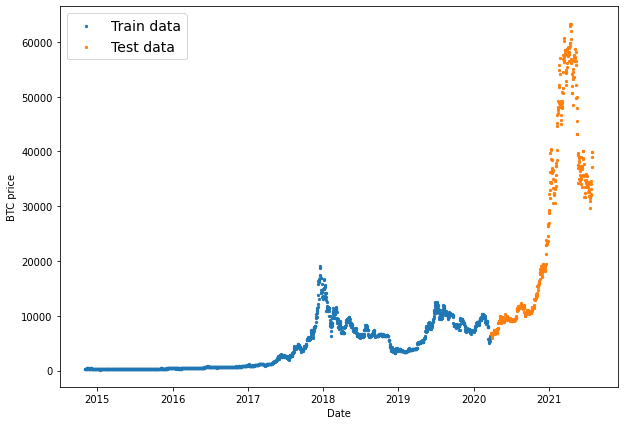

In [70]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC price")
plt.legend(fontsize=14)
plt.show()

In [71]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

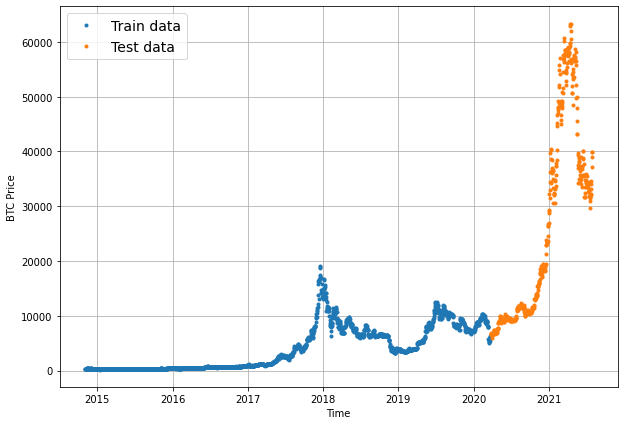

In [72]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

### Model 0: Naive Forecast (Baseline)

In [73]:
naive_forecast = y_test[:-1]

In [74]:
naive_forecast[:10], naive_forecast[-10:]

(array([6784.31801143, 6706.98508913, 6721.49539238, 6682.7800492 ,
        6229.48834283, 5922.48983509, 6483.73944553, 6446.42134684,
        6537.3364615 , 6850.55871169]),
 array([30940.28728402, 29608.59725347, 32014.43603389, 32203.3656377 ,
        33117.75146222, 34014.618359  , 34574.67066093, 37114.29662368,
        38963.92285736, 39917.4493694 ]))

In [75]:
y_test[-10:]

array([29608.59725347, 32014.43603389, 32203.3656377 , 33117.75146222,
       34014.618359  , 34574.67066093, 37114.29662368, 38963.92285736,
       39917.4493694 , 39810.51797108])

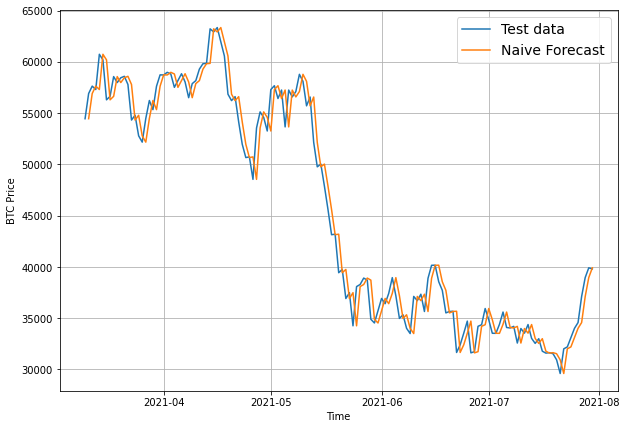

In [76]:
# plot
plt.figure(figsize=(10,7))
#plot_time_series(X_train, y_train, label="Train data")
plot_time_series(X_test, y_test, start=350, format="-" ,label="Test data")
plot_time_series(X_test[1:], naive_forecast, start=350, format="-", label="Naive Forecast")

In [77]:
import tensorflow as tf

In [78]:
# implementing MASE: Mean Absolute Scaled Error

def mean_absolute_scaled_error(y_true, y_pred):

  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae/mae_naive_no_season

In [79]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

0.9981720899380154

In [80]:
# evaluation values

def evaluate_pred(y_true, y_pred):

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)

  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)

  rmse = tf.sqrt(mse)

  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)

  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [81]:
evaluate_pred(y_test[1:], naive_forecast)

{'mae': 766.7915658178626,
 'mape': 2.628253505177376,
 'mase': 0.9981720899380154,
 'mse': 1660526.488939261,
 'rmse': 1288.61417380815}

### Formatting Data: Windowing dataset

In [82]:
HORIZON = 1
WINDOW_SIZE = 7

In [85]:
prices[:10]

array([325.22633, 331.60083, 324.71833, 332.45666, 336.585  , 346.775  ,
       344.81166, 343.065  , 358.50166, 368.07666])

In [99]:
def get_labelled_windows(x, horizon=HORIZON):

  return x[:, :-horizon], x[:, -horizon:]

In [100]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))

In [101]:
tf.squeeze(test_window).numpy()

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

In [102]:
tf.squeeze(test_label).numpy()

7

In [103]:
import numpy as np

In [137]:
# create a function to view Numpy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):

  #1. create a window of specific window_size(add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  #2. create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)), axis=0).T
  #print(f"{window_indexes, window_indexes.shape}")

  #3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  #print(f"{window_indexes, window_indexes.shape}")

  #4. Get labelled windows
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)

  return windows, labels

In [138]:
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2455, 2455)

In [115]:
# view 1st 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} --> Label {full_labels[i]}")

Window: [325.22633 331.60083 324.71833 332.45666 336.585   346.775   344.81166] --> Label [343.065]
Window: [331.60083 324.71833 332.45666 336.585   346.775   344.81166 343.065  ] --> Label [358.50166]
Window: [324.71833 332.45666 336.585   346.775   344.81166 343.065   358.50166] --> Label [368.07666]


In [116]:
# view last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} --> Label {full_labels[i-3]}")

Window: [29608.59725347 32014.43603389 32203.3656377  33117.75146222
 34014.618359   34574.67066093 37114.29662368] --> Label [38963.92285736]
Window: [32014.43603389 32203.3656377  33117.75146222 34014.618359
 34574.67066093 37114.29662368 38963.92285736] --> Label [39917.4493694]
Window: [32203.3656377  33117.75146222 34014.618359   34574.67066093
 37114.29662368 38963.92285736 39917.4493694 ] --> Label [39810.51797108]


In [117]:
prices[-1]

39810.5179710787

### Turining windows into training and test sets

In [130]:
def make_train_test_split(windows, labels, test_split=0.2):
 
  splits_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [132]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)

In [133]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1969, 486, 1969, 486)

In [134]:
train_windows[:5], train_labels[:5]

(array([[325.22633, 331.60083, 324.71833, 332.45666, 336.585  , 346.775  ,
         344.81166],
        [331.60083, 324.71833, 332.45666, 336.585  , 346.775  , 344.81166,
         343.065  ],
        [324.71833, 332.45666, 336.585  , 346.775  , 344.81166, 343.065  ,
         358.50166],
        [332.45666, 336.585  , 346.775  , 344.81166, 343.065  , 358.50166,
         368.07666],
        [336.585  , 346.775  , 344.81166, 343.065  , 358.50166, 368.07666,
         376.99666]]), array([[343.065  ],
        [358.50166],
        [368.07666],
        [376.99666],
        [442.10666]]))

In [135]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

In [140]:
len(train_labels[:-HORIZON-1]), len(y_train[WINDOW_SIZE:])

(1967, 1962)

### Make modelling checkpoint